#1.비선형 SVM을 이용한 데이터 분류

In [15]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc+'twisted_data.csv')
df.tail(5)

,x1,x2,y
995,1.112475,-0.180790,0
996,-2.544258,-0.559755,0
997,-1.044663,0.164435,1
998,-1.475026,-0.683385,0
999,1.860988,0.728986,1


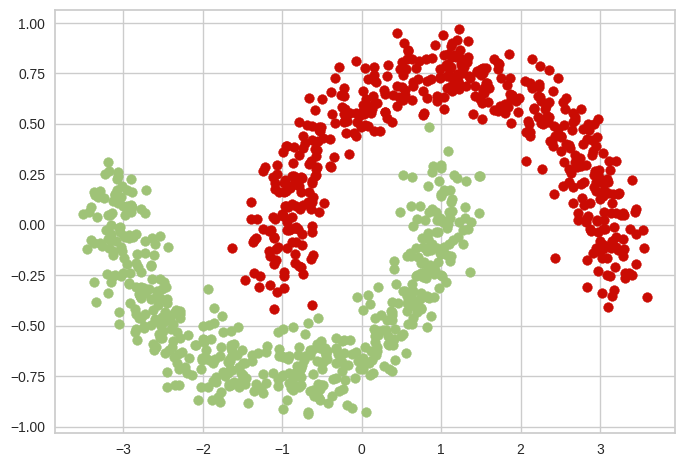

In [16]:
df_positive = df[df['y'] > 0]
df_negative = df[df['y'] == 0]

import matplotlib.pyplot as plt
plt.scatter(df_positive.loc[:,['x1']], df_positive.loc[:,['x2']], color='r')
plt.scatter(df_negative.loc[:,['x1']], df_negative.loc[:,['x2']], color='g')

In [10]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from yellowbrick.contrib.classifier import DecisionViz

X = df.loc[:, ['x1','x2']].to_numpy()
y = df['y']

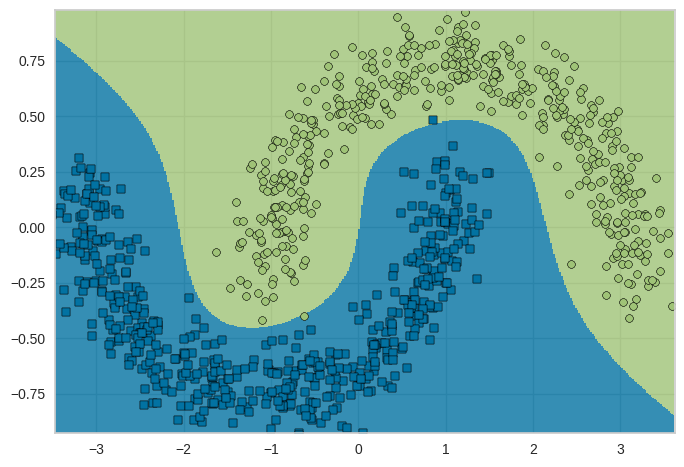

In [14]:
polynomial_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=5)),
    ('svm_clf', LinearSVC(C=1, loss='hinge'))
])

polynomial_svm_clf.fit(X,y)
viz = DecisionViz(polynomial_svm_clf, title='polynomial feature SVM')
viz.fit(X, y)
viz.draw(X, y)

#2.커널 트릭을 이용한 비선형 SVM

In [ ]:
import pandas as pd
import numpy as np

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
df = pd.read_csv(data_loc + 'twisted_data.csv')

from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from yellowbrick.contrib.classifier import DecisionViz

X = df.loc[:,['x1', 'x2']].to_numpy()
y = df['y']

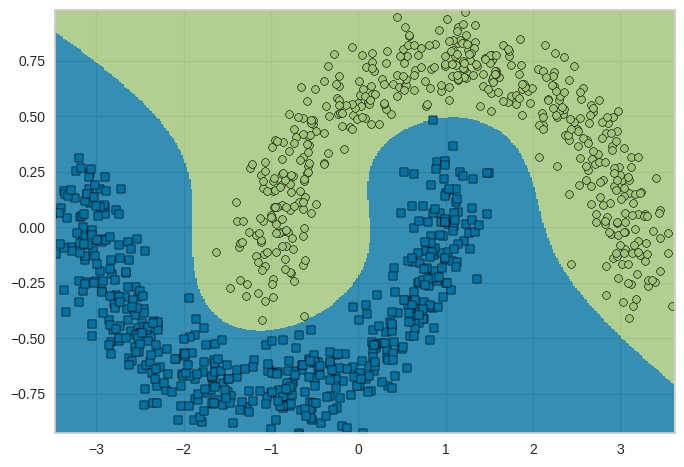

In [6]:
polynomial_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(C=10, kernel='poly', degree=4, coef0=2))
])

polynomial_svm_clf.fit(X,y)
viz = DecisionViz(polynomial_svm_clf, title='polynomial feature SVM')
viz.fit(X,y)
viz.draw(X,y)